# Understanding Descriptive Statistics

Import the necessary libraries here:

In [86]:
# Libraries
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [87]:
def roll_dice(ntimes=1):
    return np.random.choice([1,2,3,4,5,6], size=ntimes)

In [88]:
# your code here
df = pd.DataFrame()
df["result"] = roll_dice(10)


#### 2.- Plot the results sorted by value.

In [89]:
df

,result
0,3
1,1
2,6
3,6
4,6
5,5
6,2
7,3
8,2
9,1


Text(0, 0.5, 'Dice face')

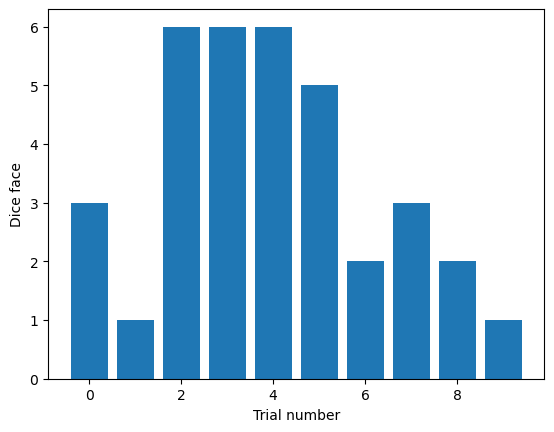

In [90]:
fig, ax = plt.subplots(1,1)
ax.bar(x=df.index, height=df.result)
ax.set_xlabel("Trial number")
ax.set_ylabel("Dice face")

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [91]:
# your code here
df.value_counts()

result
6         3
1         2
2         2
3         2
5         1
dtype: int64

Text(0.5, 0, 'Rolling result')

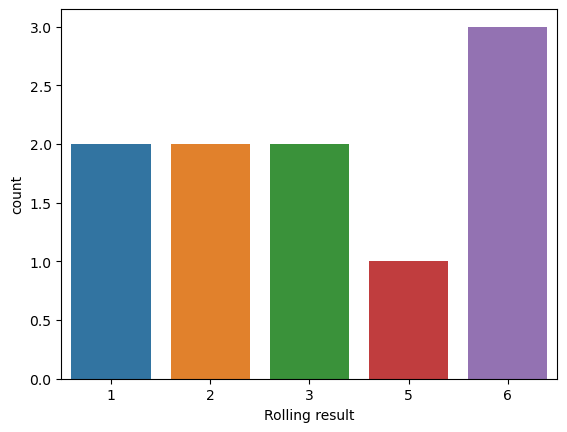

In [92]:
ax =sns.countplot(data=df, x="result")
ax.set_xlabel("Rolling result")

The first figure shows the result for each individual roll of dice. The second groups by the count of the number of outputs. Since it is a random event there is no evident expected distribution

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [93]:
def mean_dice(values):
    return np.sum(values)/len(values)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [94]:
# your code here
freq_dist = df.value_counts()

In [95]:
mean_dice(df.result.values)

3.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [96]:
def median_dice(values):
    if len(values)%2 == 0:
        indx = int(len(values)/2)
        sorted_vals = np.sort(values)
        return np.sum(sorted_vals[indx-1:indx+1])/2
    else:
        indx = int(len(values)//2)
        sorted_vals = np.sort(values)
        return sorted_vals[indx]


In [97]:
# your code here
median_dice(df.result.values)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [98]:
def quartiles(values, qper=0.5):
    sizen = len(values)
    sorted_vals = np.sort(values)
    divi = int(qper/0.25)
    #Check if even or odd number of values
    if sizen%2== 0:
        indx = int((sizen/4) * divi)
        return np.sum(sorted_vals[indx-1:indx+1])/2
    else:
        indx = int((sizen//4) * divi)
        return sorted_vals[indx] 

In [99]:
print(df.result.values)
q25 = quartiles(df.result.values, qper=0.25)
print(f"q25 is {q25}")
q75 = quartiles(df.result.values, qper=0.75)
print(f"q75 is {q75}")


[3 1 6 6 6 5 2 3 2 1]
q25 is 1.5
q75 is 5.5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [100]:
# your code here
df = pd.read_csv("roll_the_dice_hundred.csv")

In [101]:
df.head()
df.drop(columns={"Unnamed: 0"},inplace=True)

Text(0.5, 0, 'Rolling result')

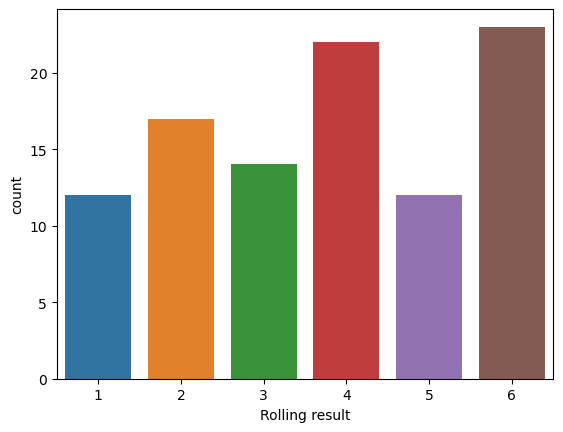

In [102]:

ax =sns.countplot(data=df, x="value")
ax.set_xlabel("Rolling result")

In [103]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [104]:
# your code here
mean_dice(df.value.values)

3.74

#### 3.- Now, calculate the frequency distribution.


In [105]:
# your code here
# your code here
freq_dist = df.value_counts("value")
freq_dist

value
6    23
4    22
2    17
3    14
1    12
5    12
dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot: >

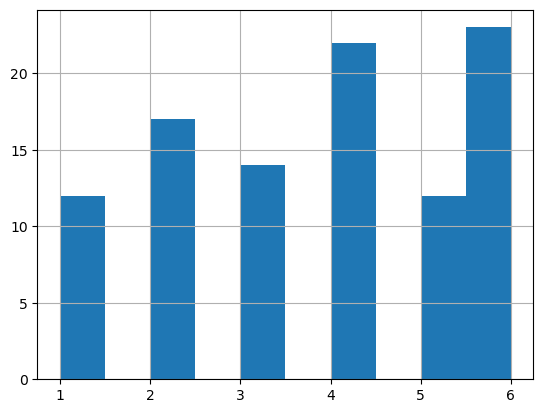

In [106]:
# your code here
df.value.hist()

In [107]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [108]:
# your code here
df = pd.read_csv("roll_the_dice_thousand.csv")

In [109]:
df.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


<AxesSubplot: >

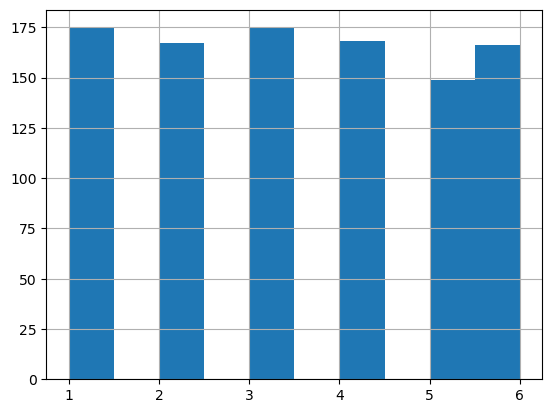

In [110]:
df.value.hist()

In [111]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [112]:
# your code here
dfage_a = pd.read_csv("ages_population.csv")
freq_dist= dfage_a.value_counts()

array([[<AxesSubplot: title={'center': 'observation'}>]], dtype=object)

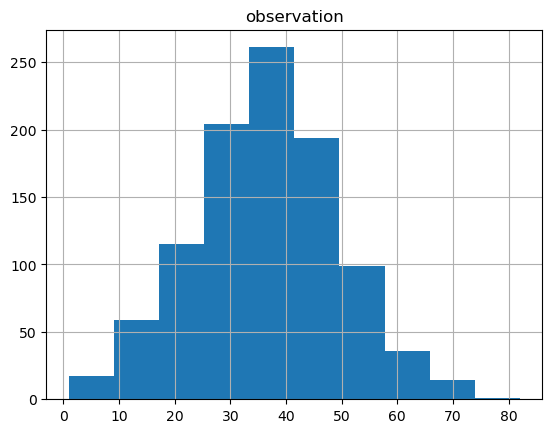

In [113]:
dfage_a.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [114]:
# your code here
# your code here
mean_age_a = dfage_a.mean()
print(f"Mean value {mean_age_a}")
mean_age_std = dfage_a.std()
print(f"std value  {mean_age_std}")

Mean value observation    36.56
dtype: float64
std value  observation    12.8165
dtype: float64


In [115]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [116]:
dfage_b= pd.read_csv("ages_population2.csv")
dfage_b.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


array([[<AxesSubplot: title={'center': 'observation'}>]], dtype=object)

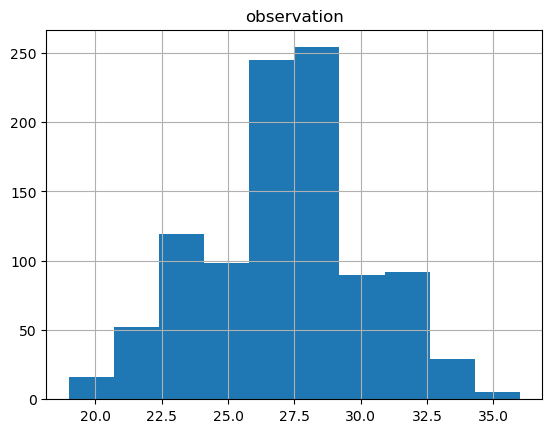

In [117]:
freq_dist_b = dfage_b.value_counts()
dfage_b.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [118]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [119]:
# your code here
mean_age_b = dfage_b.mean()
print(f"Mean value {mean_age_b}")
mean_age_std_b = dfage_b.std()
print(f"std value  {mean_age_std_b}")

Mean value observation    27.155
dtype: float64
std value  observation    2.969814
dtype: float64


In [120]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [121]:
# your code here
dfage_c = pd.read_csv("ages_population3.csv")
dfage_c.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [122]:
# your code here
mean_age_c = dfage_c.mean()
print(f"Mean value {mean_age_c}")
mean_age_std_c = dfage_c.std()
print(f"std value  {mean_age_std_c}")

Mean value observation    41.989
dtype: float64
std value  observation    16.144706
dtype: float64


In [123]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [124]:
# your code here
q25 = quartiles(dfage_c.observation.values,qper=0.25)
print(f"1st quartile : {q25}")
q50 = quartiles(dfage_c.observation.values,qper=0.5)
print(f"2nd quartile : {q50}")
q75 = quartiles(dfage_c.observation.values,qper=0.75)
print(f"3rd quartile : {q75}")


1st quartile : 30.0
2nd quartile : 40.0
3rd quartile : 53.0


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [144]:
# your code here
def percentiles(values, qper=0.5):
    sizen = len(values)
    sorted_vals = np.sort(values)
    divi = int(qper/0.01) #100 percentiles
    #Check if even or odd number of values
    if sizen%2== 0:
        indx = int((sizen/100) * divi)
        perc= np.sum(sorted_vals[indx-1:indx+1])/2
    else:
        indx = int((sizen//100) * divi)
        perc= sorted_vals[indx] 
    return perc

<AxesSubplot: >

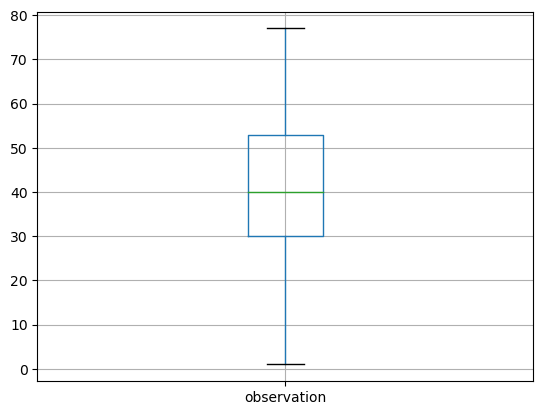

In [135]:
dfage_c.boxplot()

In [146]:
percentil20 = percentiles(dfage_c.observation.values,qper=0.2)
print(f"20th percentile : {percentil20}")

percentil75 = percentiles(dfage_c.observation.values,qper=0.75)
print(f"75th percentile : {percentil75}")

percentil90 = percentiles(dfage_c.observation.values,qper=0.9)
print(f"90th percentile : {percentil90}")

percentil95 = percentiles(dfage_c.observation.values,qper=0.95)
print(f"95th percentile : {percentil95}")

percentil95 = percentiles(dfage_c.observation.values,qper=0.99)
print(f"99th percentile : {percentil95}")


20th percentile : 28.0
75th percentile : 53.0
90th percentile : 67.0
95th percentile : 70.0
99th percentile : 74.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""